# Bayesian Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import X, t

## Import dataset

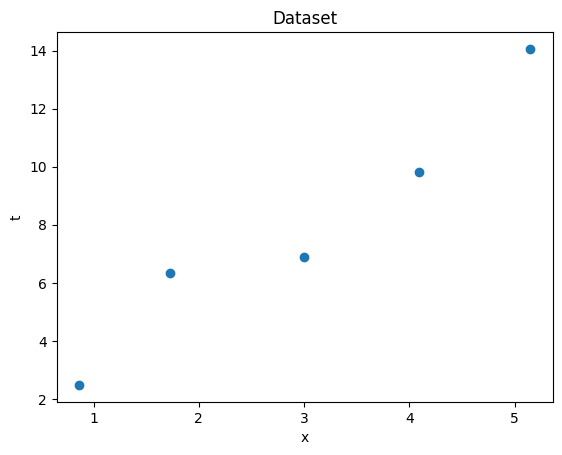

In [2]:
# Plot the dataset
plt.scatter(X, t)
plt.xlabel("x")
plt.ylabel("t")
plt.title("Dataset")
plt.show()

In [3]:
# Form augmented version of the input variable
X_augmented = np.hstack((np.ones_like(X).reshape(-1, 1), X.reshape(-1, 1)))

## Bayesian Linear Regression

We implement Bayesian Linear Regression, using the formula found in the "Pattern Recognition and Machine Learning" book

In [4]:
def find_posterior_mean_and_covariance(X, t, alpha=0.5, beta=0.5):
    """
    Find the posterior mean and covariance matrix of the parameters w
    :param X: the inputs
    :param t: the labels
    :param alpha: precision of w
    :param beta: precision of t|w
    :return: m_N (mean) and S_N (covariance) matrix
    """
    covariance = np.linalg.inv(alpha * np.eye(X.shape[1]) + beta * X.T @ X)
    mean = beta * np.dot(covariance @ X.T, t)
    return covariance, mean


def predict(X_new, covariance, mean, beta=0.5):
    """
    Find the mean and variance of the new label t_new
    :param X_new: the new datapoints
    :param covariance: posterior covariance of w
    :param mean: posterior mean of w
    :param beta: precision of t|w
    :return: the mean and variance of the prediction
    """
    means = []
    variances = []
    
    for x_new in X_new:
        mean_t = np.dot(mean, x_new)
        variance_t = 1/beta + np.dot(x_new, np.dot(covariance, x_new))
        means.append(mean_t)
        variances.append(variance_t)
        
    return means, variances

In [5]:
# Generate prediction
covariance_w, mean_w = find_posterior_mean_and_covariance(X_augmented, t)
means, variances = predict(X_augmented, covariance_w, mean_w)

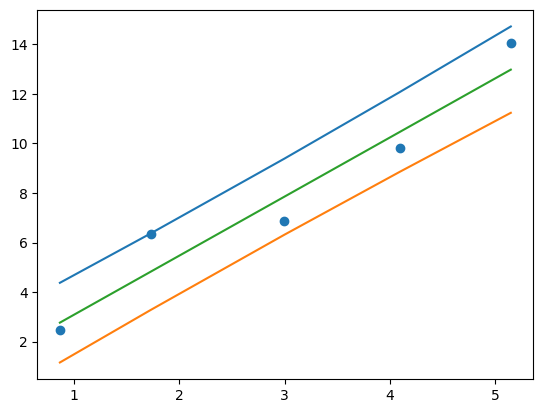

In [6]:
# Calculate the confidence interval of prediction
upper_bound = means + np.sqrt(variances)
lower_bound = means - np.sqrt(variances)

# Plot the prediction
plt.scatter(X, t)
plt.plot(X, upper_bound)
plt.plot(X, lower_bound)
plt.plot(X, means)
plt.show()